<h3>Table of Contents:</h3>
<div>
<ol>
    <li><a href="#il">Importing Libraries</a></li>
    <li><a href="#rd">Reading the Data</a></li>
    <li><a href="#td">Detailed analysis of train data</a></li>
    <li><a href="#ct">Cleaning and Tokenization</a></li>
    <li><a href="#lt">Lemmatization</a></li>
    <li><a href="#sv">Splitting the Dataset</a></li>
    <li><a href="#tf">Tfidf Vectorization</a></li>
    <li><a href="#lc">Linear SVC</a></li>
    <li><a href="#lr">Logistic Regression</a></li>
</ol>
</div>

<div id = 'il'>
<h3
   style="color:green;"  >1. Importing Libraries</h3>
</div>

In [1]:
import pandas as pd
import re
import emoji
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div id = "rd">
<h3
   style="color:green;"  >2. Reading the Data</h3>
</div>

In [2]:
train_df = pd.read_csv("/kaggle/input/sentiment-analysis/training.1600000.processed.noemoticon.csv",encoding='latin-1', header=None)

test_df= pd.read_csv("/kaggle/input/sentiment-analysis/testdata.manual.2009.06.14.csv",header = None)

<h4
   style="color:brown;" >Quick Inspection of data</h4>


<h5
   style="color:blue;" >1. Inspection of Training data</h3>

In [3]:
train_df.head(15)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


<div>
<h5
   style="color:blue;" >Upon initial Inspection of train data these were my observations:</h5>
<ul >
     <li>Data has no column names</li>
     <li>Column 0 is target label</li>
     <li>I need to check if column 3 has any significance</li>
     <li>The main Text data in column 5 is raw data with links, mentions, stopwords, puntuations, emojis etc</li>
     
</ul>
</div>










In [4]:
test_df.head(15)

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...




<div>
<h5
   style="color:blue;" >Upon initial Inspection of test data these were my observations:</h5>
<ul >
     <li>Data has no column names</li>
     <li>Column 0 is target label</li>
     <li>Column 2 is date and time of the respective tweets</li>
     <li>Column 3 Might be the Topic of tweets </li>
     <li>The main Text data in column 5 is raw data with links,mentions,stopwords, emojis, puntuations etc</li>
     
</ul>
</div>













<h4
   style="color:brown;" >Giving data Column names:</h4>


In [5]:
train_df.columns = ['Sentiment','Id', 'Time', 'Query','User', 'Text']



test_df.columns = ['Sentiment','Id', 'Time', 'Topic','User', 'Text']

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Time       1600000 non-null  object
 3   Query      1600000 non-null  object
 4   User       1600000 non-null  object
 5   Text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  498 non-null    int64 
 1   Id         498 non-null    int64 
 2   Time       498 non-null    object
 3   Topic      498 non-null    object
 4   User       498 non-null    object
 5   Text       498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


<strong>There are no null values in both train and test sets</strong>

<h4
   style="color:brown;" >Checking the significance of Query Column:</h4>



In [8]:
train_df['Query'].value_counts()

Query
NO_QUERY    1600000
Name: count, dtype: int64

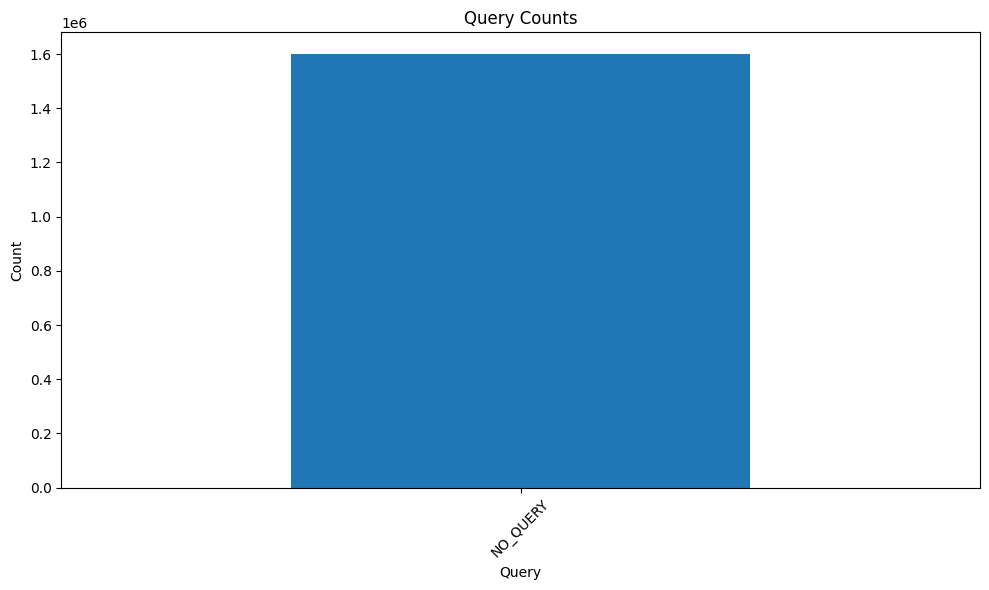

In [9]:
import matplotlib.pyplot as plt


query_counts = train_df['Query'].value_counts()


plt.figure(figsize=(10, 6))  
query_counts.plot(kind='bar')
plt.title('Query Counts')
plt.xlabel('Query')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<strong>Since all the values are "NO_QUERY" the Query column dosent hold any significance in training a model"</strong>

<h4
   style="color:brown;" >Checking Number of unique Labels:</h4>



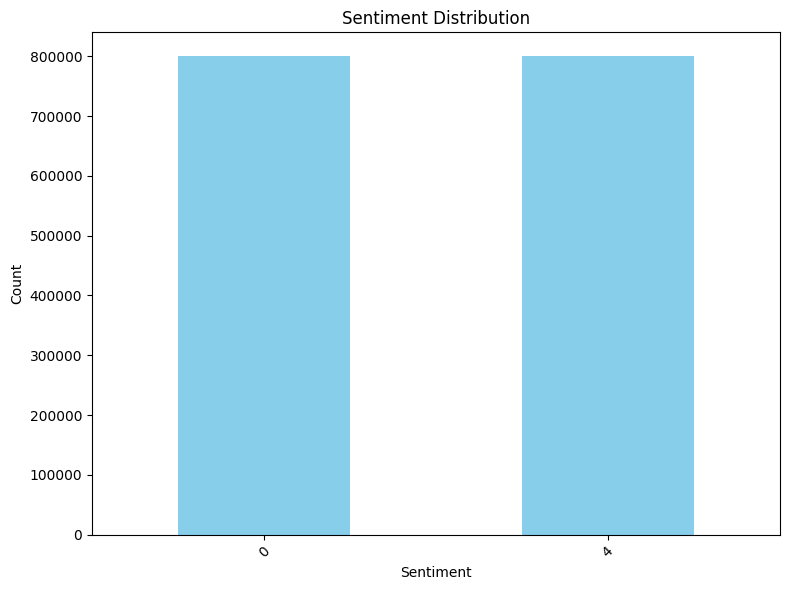

In [10]:

sentiment_counts = train_df['Sentiment'].value_counts()


plt.figure(figsize=(8, 6))  
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<strong>Since there are only two labels they should be positive and negative, from Observation 0 is negative and 4 is positive</strong>

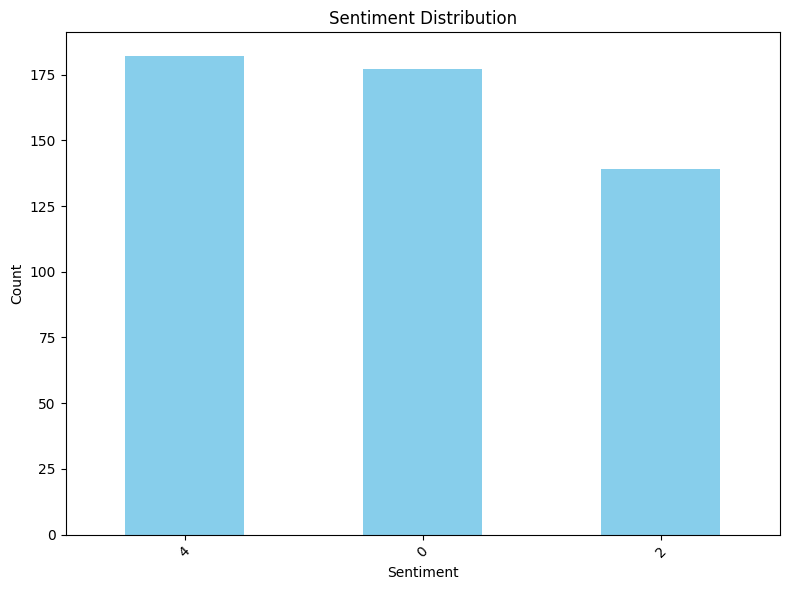

In [11]:
test_sentiment_counts = test_df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))  
test_sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<strong>There are no values with sentiment = 2 in the train set so we can not predict sentiment = 2 [neutral],in testset. So we have to drop these values</strong>

<h4
   style="color:brown;" >Removing the neutral/'2's from test data::</h4>



In [12]:
for index, rows in test_df.iterrows():
    if rows['Sentiment'] == 2:
        test_df = test_df.drop(index)

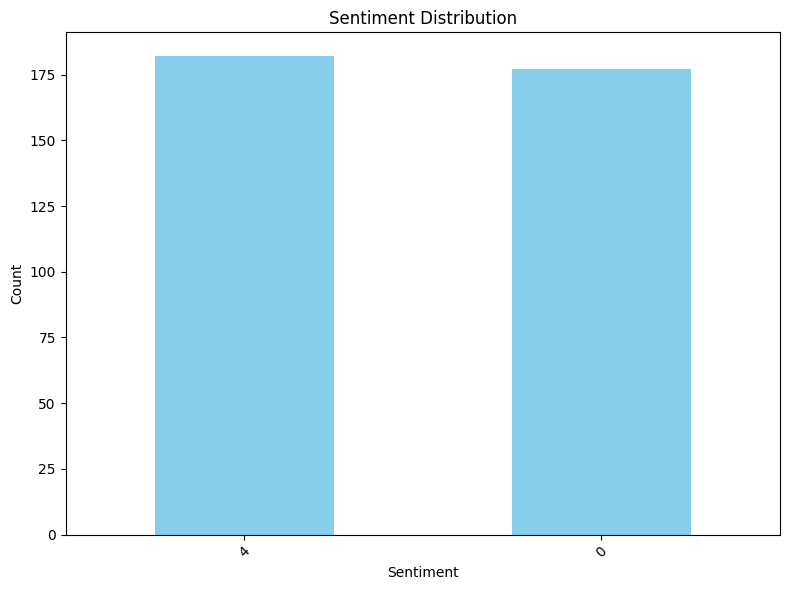

In [13]:
test_sentiment_counts = test_df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))  
test_sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


<h3
   style="color:green;" >3. Detailed analysis of train data</h3>



<div id = 'td'>
<h4
   style="color:brown;" >Checking for Duplicates:</h4>
</div>



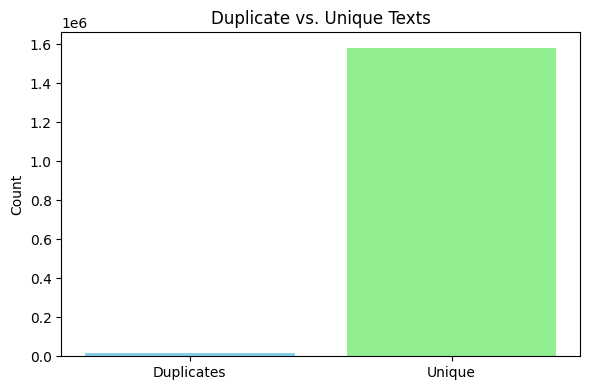

In [14]:
# print("Number of Duplicates : ",1600000-train_df['Text'].nunique())
num_duplicates = 1600000 - train_df['Text'].nunique()

plt.figure(figsize=(6, 4))  
plt.bar(['Duplicates', 'Unique'], [num_duplicates, train_df['Text'].nunique()], color=['skyblue', 'lightgreen'])
plt.title('Duplicate vs. Unique Texts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
print("Number of Duplicates : ",1600000-train_df['Text'].nunique())

Number of Duplicates :  18534




<h4
   style="color:brown;" >Checking for Null Values:</h4>



In [16]:
(train_df['Text'].isna() | (train_df['Text'] == '')).sum()


0

In [17]:
train_df['Text'].head(20)

0     @switchfoot http://twitpic.com/2y1zl - Awww, t...
1     is upset that he can't update his Facebook by ...
2     @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire 
4     @nationwideclass no, it's not behaving at all....
5                         @Kwesidei not the whole crew 
6                                           Need a hug 
7     @LOLTrish hey  long time no see! Yes.. Rains a...
8                  @Tatiana_K nope they didn't have it 
9                             @twittera que me muera ? 
10          spring break in plain city... it's snowing 
11                           I just re-pierced my ears 
12    @caregiving I couldn't bear to watch it.  And ...
13    @octolinz16 It it counts, idk why I did either...
14    @smarrison i would've been the first, but i di...
15    @iamjazzyfizzle I wish I got to watch it with ...
16    Hollis' death scene will hurt me severely to w...
17                                 about to file

<strong>The text column has both uppercase and lower case letters with lots of stopwords and insignificant data as mentioned in the Initial Inspection</strong>


<div id = "ct">
<h3
   style="color:green;" >4. Cleaning and Tokenization Function</h3>
</div>


In [18]:
nlp = spacy.load('en_core_web_sm')
def cleanNTokenize(df):

#  Removing Emojis: 

    for col in df.columns:
        if col == 'text':
            df[col] = df[col].apply(lambda x: emoji.demojize(x))

#  Replacing @ Tags with Empty Strings:

    pattern = r'@\w+'
    df['Text'] = df['Text'].apply(lambda x: re.sub(pattern, '', str(x)))
    
#  Replacing # hashtags with Empty Strings: 
    
    pattern = r'#\w+'
    df['Text'] = df['Text'].apply(lambda x: re.sub(pattern, '', str(x)))
    
    
#  Replacing Links with Empty Strings: 

    pattern = r'http\S+|www.\S+'
    df['Text'] = df['Text'].str.replace(pattern, '', regex=True)
    
#  Removing all the stopwords:
    
    stop_words = set(stopwords.words('english'))
    df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

#  Convertin into LowerCase: 
    
    df['Text'] = df['Text'].str.lower()
    
#  Removing Duplicates: 
    
    df.drop_duplicates(subset='Text', inplace=True)
    
#  Replacing punctuations with empty Strings: 
    
    df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#  Finally Tokenizing
    
    df['tokenized'] = df['Text'].apply(word_tokenize)
    
    return df

In [19]:
train_df.head(10)

,Sentiment,Id,Time,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [20]:
train_df = cleanNTokenize(train_df)

<strong>since there can be new null values after cleaning we need to check for null values again</strong>

In [21]:
(train_df['Text'].isna() | (train_df['Text'] == '')).sum()

17



<h4
   style="color:brown;" >Dropping the null Values:</h4>



In [22]:
train_df.dropna(subset=['Text'], inplace=True)
train_df = train_df[train_df['Text'] != '']

In [23]:
train_df.head(10)

,Sentiment,Id,Time,Query,User,Text,tokenized
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww s bummer shoulda got david carr third ...,"[awww, s, bummer, shoulda, got, david, carr, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset ca nt update facebook texting might cry...,"[upset, ca, nt, update, facebook, texting, mig..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest g...,"[dived, many, times, ball, managed, save, 50, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,s behaving m mad ca nt see,"[s, behaving, m, mad, ca, nt, see]"
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew,"[whole, crew]"
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need hug,"[need, hug]"
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time see yes rains bit bit lol m f...,"[hey, long, time, see, yes, rains, bit, bit, l..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope nt,"[nope, nt]"
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que muera,"[que, muera]"


In [24]:
test_df = cleanNTokenize(test_df)

In [25]:
from nltk.stem import WordNetLemmatizer
import nltk
# nltk.download()
nltk.download('wordnet',download_dir='/root/nltk_data/')

[nltk_data] Downloading package wordnet to /root/nltk_data/...


True


<div id = 'lt'>
<h3
   style="color:green;" >5. Lemmatization</h3>
</div>



There seems to be an issue in unzipping the wordnet.zip file, so i am manually unzipping it.

In [26]:
# ls ../../root/nltk_data/corpora/wordnet.zip
import zipfile
import os

zip_file_path = '../../root/nltk_data/corpora/wordnet.zip'

extracted_dir = '../../root/nltk_data/corpora/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(os.listdir(extracted_dir))

['wordnet', 'wordnet.zip']


In [27]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)  # Join lemmatized tokens into a string
    return lemmatized_text

train_df['Lemmatized'] = train_df['tokenized'].apply(lemmatize_text)


In [28]:
# train_df['Lemmatized'] = train_df['tokenized'].apply(lemmatize_text)

In [29]:
test_df['Lemmatized'] = test_df['tokenized'].apply(lemmatize_text)

In [30]:
train_df.head()

,Sentiment,Id,Time,Query,User,Text,tokenized,Lemmatized
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww s bummer shoulda got david carr third ...,"[awww, s, bummer, shoulda, got, david, carr, t...",awww s bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset ca nt update facebook texting might cry...,"[upset, ca, nt, update, facebook, texting, mig...",upset ca nt update facebook texting might cry ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest g...,"[dived, many, times, ball, managed, save, 50, ...",dived many time ball managed save 50 rest go b...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]",whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,s behaving m mad ca nt see,"[s, behaving, m, mad, ca, nt, see]",s behaving m mad ca nt see


In [31]:
X = train_df['Lemmatized']
y = train_df['Sentiment']



<div id = "sv">
<h3
   style="color:green;" >6. Splitting into Training and validation sets:</h3>
</div>




In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size =0.3, random_state = 0)


<div id = "tf">
<h3
   style="color:green;" >7. Tfidf Vectorization:</h3>
</div>


In [33]:
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)



<div id = "lc">
<h3
   style="color:green;" >8. Linear SVC</h3>
</div>



In [34]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_transformed, y_train)

LinearSVC()

In [35]:
X_val_transformed = vectorizer.transform(X_val)

In [36]:
y_pred = svm.predict(X_val_transformed)



<h4
   style="color:brown;" >Accuracy Score on Validation Set:</h4>



In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7723098238437686


In [38]:
X_test = test_df['Lemmatized']
y_test = test_df['Sentiment']
X_test_transformed = vectorizer.transform(X_test)

In [39]:
preds1 = svm.predict(X_test_transformed)



<h4
   style="color:brown;" >Accuracy Score on Test data using Linear SVC</h4>



In [40]:
accuracy = accuracy_score(y_test, preds1)
print("Accuracy:", accuracy)

Accuracy: 0.807799442896936



<div id="lr">

<h3
   style="color:green;" >9. Logistic Regression:</h3>
</div>


In [41]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(penalty='l2', max_iter=1000)
logReg.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=1000)

In [42]:
preds2=logReg.predict(X_test_transformed)


<h4
   style="color:brown;" >Accuracy Score on Test Data using LogisticRegression:</h4>

In [43]:
accuracy = accuracy_score(y_test, preds2)
print("Accuracy:", accuracy)

Accuracy: 0.8050139275766016


In [44]:
from sklearn.naive_bayes import MultinomialNB

nB = MultinomialNB()
nB.fit(X_train_transformed,y_train)

MultinomialNB()

In [45]:
preds4 = nB.predict(X_test_transformed)

In [46]:
accuracy = accuracy_score(y_test, preds4)
print("Accuracy:", accuracy)

Accuracy: 0.7994428969359332
